In [759]:
import pandas as pd
import numpy as np
from DataFrameInfo import DataFrameInfo
import matplotlib.pyplot as plt


df = pd.read_csv('loan_payments_skewness_corrected.csv')

([<matplotlib.patches.Wedge at 0x1f49f5a4aa0>,
 [Text(-1.1849652747295496, -0.18936023258626117, 'Paid'),
  Text(1.1849652924587288, 0.18936012164180435, 'Unpaid')],
 [Text(-1.0862181685020873, -0.17358021320407277, '55%'),
  Text(1.086218184753835, 0.17358011150498734, '45%')])

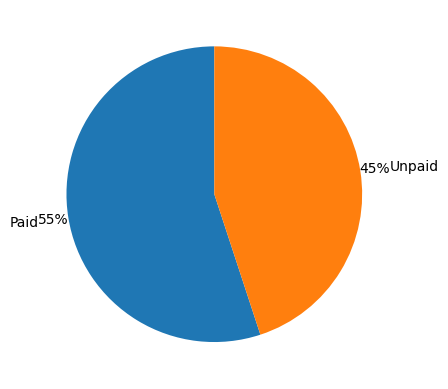

In [648]:
df['percentage_paid'] = df['total_payment']/df['loan_amount'] *100
labels= 'Paid', 'Unpaid'
data = [(df['percentage_paid'] > 100).sum(), (df['percentage_paid'] < 100).sum()]

plt.pie(data, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, startangle = 90)

([<matplotlib.patches.Wedge at 0x1f49f5cec00>,
 [Text(-0.9381782646042408, -0.7482122318060398, 'Paid'),
  Text(0.9381782646042408, 0.7482122318060397, 'Unpaid')],
 [Text(-0.8599967425538875, -0.6858612124888699, '71%'),
  Text(0.8599967425538875, 0.6858612124888698, '29%')])

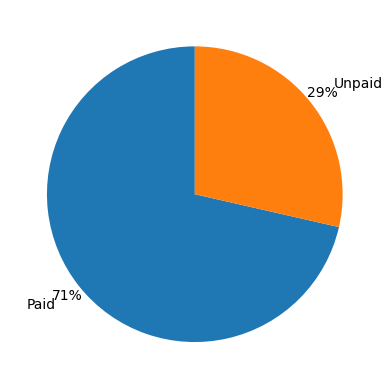

In [649]:
df['future_state_6_months'] = ((df['instalment'] *6) + df['total_payment'])
df['future_percentage_paid'] = df['future_state_6_months']/df['funded_amount'] *100
labels= 'Paid', 'Unpaid'
future_data = [(df['future_percentage_paid'] > 100).sum(), (df['future_percentage_paid'] < 100).sum()]

plt.pie(future_data, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, startangle = 90)

As seen above, currently only 56% of all customers have paid off their loan and it is projected that within six months that this will increase to 71%.

In [650]:
data = DataFrameInfo()
print(data.distinct_values(df['loan_status']))

loan_status
Fully Paid                                             26119
Current                                                18128
Charged Off                                             5146
Does not meet the credit policy. Status:Fully Paid       927
Late (31-120 days)                                       536
Does not meet the credit policy. Status:Charged Off      325
In Grace Period                                          249
Late (16-30 days)                                         90
Default                                                   47
Name: count, dtype: int64


In [651]:
charged_off_only = (df['loan_status'].value_counts()['Charged Off'])
charged_off_cp = (df['loan_status'].value_counts()['Does not meet the credit policy. Status:Charged Off'])
charged_off = charged_off_only + charged_off_cp
charged_off_percentage = (charged_off/df.shape[0] * 100)

print(f'The percentage of loans that represent a loss to the company is {charged_off_percentage}%.')

The percentage of loans that represent a loss to the company is 10.609498322570635%.


In [652]:
charged_off_only_df = df[df['loan_status'].str.match('Charged Off')]
charged_off_cp_df = df[df['loan_status'].str.match('Does not meet the credit policy. Status:Charged Off')]
charged_off_customers= [charged_off_only_df, charged_off_cp_df]
charged_off_customers = pd.concat(charged_off_customers)
charged_off_total_amount = round(charged_off_customers['total_payment'].sum(), 2)

print(f'The total amount of money that was paid towards the company by loans that have been charged off is £{charged_off_total_amount}.')


The total amount of money that was paid towards the company by loans that have been charged off is £36385845.93.


In [653]:
charged_off_customers['total_owed'] = ((charged_off_customers['instalment']) * charged_off_customers['term_months'])

charged_off_loss = round((charged_off_customers['total_owed'].sum()) - (charged_off_customers['total_payment'].sum()), 2)

print(f'The total loss made by the loans that have been charged off is £{charged_off_loss}.')


The total loss made by the loans that have been charged off is £62796887.67.


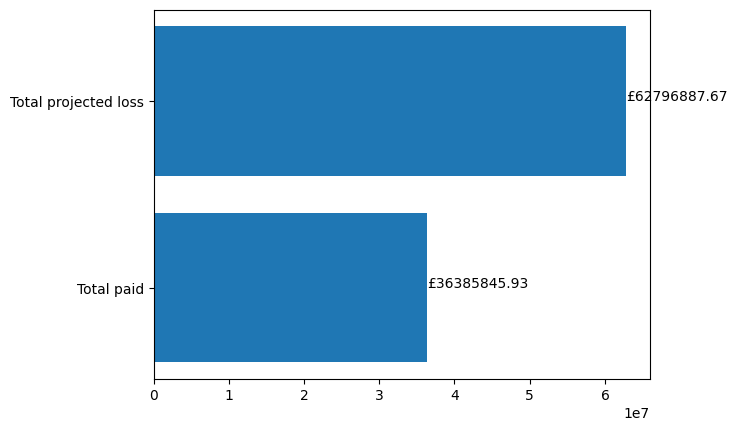

In [654]:
x_axis = ['Total paid', 'Total projected loss']
y_axis = [charged_off_total_amount, charged_off_loss]

plt.barh(x_axis, y_axis)

for index, value in enumerate(y_axis):
    plt.text(value, index,
             str(f'£{value}'))
    
plt.show()

In [655]:
late_customers_31 = (df['loan_status'] == 'Late (31-120 days)').sum()
late_customers_16 = (df['loan_status'] == 'Late (16-30 days)').sum()
late_customers_gp = (df['loan_status'] == 'In Grace Period').sum()
late_customers = late_customers_31 + late_customers_16 + late_customers_gp
print(f'There are currently {late_customers} customers that are overdue')

There are currently 875 customers that are overdue


In [656]:
percentage_overdue = round(late_customers / df.shape[0] * 100, 2)
print(f'{percentage_overdue}% of all customers are overdue on their payments.')


1.7% of all customers are overdue on their payments.


In [657]:
late_customers_31_df = df[(df['loan_status'] == 'Late (31-120 days)')]
late_customers_16_df = df[(df['loan_status'] == 'Late (16-30 days)')]
late_customers_gp_df = df[(df['loan_status'] == 'In Grace Period')]
late_customers_frame = [late_customers_16_df, late_customers_31_df, late_customers_gp_df]
late_customers_df = pd.concat(late_customers_frame)


In [658]:
late_customers_df['total_owed'] = (late_customers_df['instalment']) * (late_customers_df['term_months'])

late_customers_loss = round((late_customers_df['total_owed'].sum()) - (late_customers_df['total_payment'].sum()), 2)


In [659]:
print(f'The projected loss made by the loans that are currently late is £{late_customers_loss} if their status were to change to Charged Off.')

The projected loss made by the loans that are currently late is £8831430.27 if their status were to change to Charged Off.


In [660]:
total_potential_loss = charged_off_loss + late_customers_loss
df['multiplier'] = (100 + df['int_rate'])/100
df['total_owed'] = df['multiplier'] * df['loan_amount']
total_expected_revenue = round((df['total_owed'].sum()), 2)

percentage_total_loss= round(total_potential_loss / total_expected_revenue * 100, 2)

print(f'If customers late on payments were converted to Charged Off, then the total potential loss from late and Charged Off customers is {percentage_total_loss}% of the total expected revenue.')

If customers late on payments were converted to Charged Off, then the total potential loss from late and Charged Off customers is 9.08% of the total expected revenue.


Indicators of Loss - Grade

In [662]:
print(data.distinct_values(df['grade']))

grade
B    15590
C    12919
A     9362
D     7726
E     3867
F     1621
G      482
Name: count, dtype: int64


In [663]:
low_grade_late_customers_df = late_customers_df[(late_customers_df['grade'].isin(['C', 'D', 'E', 'F']))]
percentage_low_grade_charged_off = round(len(low_grade_late_customers_df)/len(late_customers_df) *100, 2)
print(f'{percentage_low_grade_charged_off}% of customers who are behind on their payments and are of a grade C-F.')

69.14% of customers who are behind on their payments and are of a grade C-F.


In [664]:
low_grade_charged_off_customers_df = charged_off_customers[(charged_off_customers['grade'].isin(['C', 'D', 'E', 'F']))]
percentage_low_grade_charged_off = round(len(low_grade_charged_off_customers_df)/len(charged_off_customers) *100, 2)
print(f'{percentage_low_grade_charged_off}% of customers who have had their loan charged off and are of a grade C-F.')

67.98% of customers who have had their loan charged off and are of a grade C-F.


In [665]:
fully_paid_customers_df = df[df['loan_status'].isin(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'])]

low_grade_fully_paid_customers_df = fully_paid_customers_df[(fully_paid_customers_df['grade'].isin(['C', 'D', 'E', 'F']))]

percentage_low_grade_fully_paid = round(len(low_grade_fully_paid_customers_df)/len(fully_paid_customers_df) *100, 2)

print(f'{percentage_low_grade_fully_paid}% of customers who have paid their loan in full and are of a grade C-F.')

45.19% of customers who have paid their loan in full and are of a grade C-F.


Looking at the above percentages, it can be identified that customers who loans have been labelled at a grade C or below are at a risk of not paying back the loan on time or being charged off. This should be taken into consideration when issuing loans in the future.

Indicator of Loss - Average dti

In [684]:
fully_paid_mean_dti = round(fully_paid_customers_df['dti'].mean(), 2)
charged_off_mean_dti = round(charged_off_customers['dti'].mean(), 2)
late_mean_dti = round(late_customers_df['dti'].mean(), 2)
print(f'The average dti for customers that have fully paid their loans is {fully_paid_mean_dti}')
print(f'The average dti for customers that have had their loans charged off is {charged_off_mean_dti}')
print(f'The average dti for customers that are late on their repayment is {late_mean_dti}')


The average dti for customers that have fully paid their loans is 14.47
The average dti for customers that have had their loans charged off is 16.21
The average dti for customers that are late on their repayment is 18.68


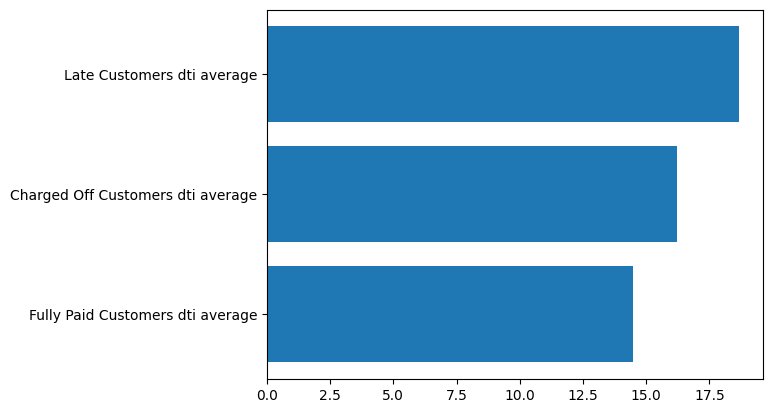

In [690]:
x = np.array(["Fully Paid Customers dti average", "Charged Off Customers dti average", "Late Customers dti average"])
y = np.array([fully_paid_mean_dti, charged_off_mean_dti, late_mean_dti])

plt.barh(x,y)
plt.show()

The dti values that have been calculated is a ratio of the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income. It is evident that customers that have a higher dti are liable for not repaying their loan back on time. This should be considered as an indicator of a potential loss in revenue for future customers who request a loan.

Indicators off Loss - Purpose of loan

In [666]:
print(data.distinct_values(df['purpose']))

purpose
debt_consolidation    28241
credit_card           10551
other                  3483
home_improvement       3015
major_purchase         1600
small_business         1257
car                     987
medical                 595
wedding                 522
moving                  430
house                   332
vacation                296
educational             186
renewable_energy         72
Name: count, dtype: int64


In [755]:
purpose_late_customers = round((late_customers_df['purpose'].str.contains('debt_consolidation|credit_card').sum())/late_customers_df.shape[0] * 100)
purpose_charged_off = round((charged_off_customers['purpose'].str.contains('debt_consolidation|credit_card').sum())/charged_off_customers.shape[0] * 100)

print(f'{purpose_late_customers}% of customers who are late on their payments are using it for debt consolidation or credit card repayment.')
print(f'{purpose_charged_off}% of customers who are charged off from loan repayment used it for debt consolidation or credit card repayment.')


83% of customers who are late on their payments are using it for debt consolidation or credit card repayment.
70% of customers who are charged off from loan repayment used it for debt consolidation or credit card repayment.


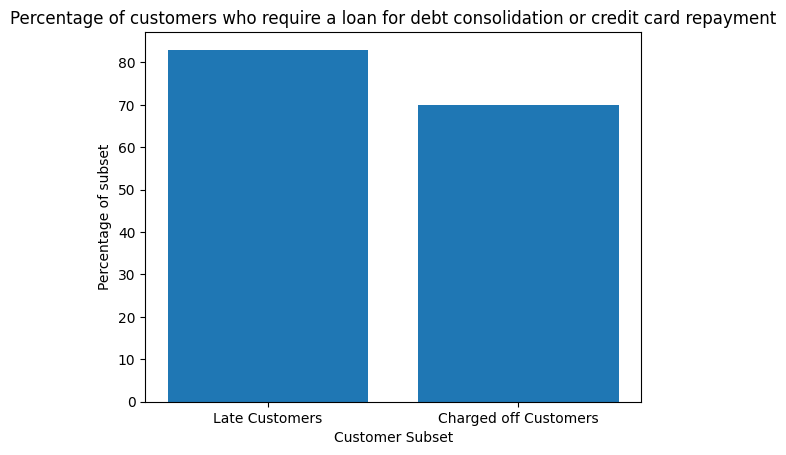

In [758]:
x = np.array(["Late Customers", "Charged off Customers"])
y = np.array([purpose_late_customers, purpose_charged_off])
plt.title('Percentage of customers who require a loan for debt consolidation or credit card repayment')
plt.xlabel('Customer Subset')
plt.ylabel('Percentage of subset')
plt.bar(x,y)
plt.show()

The bar chart shows that there is a much larger proportion of customers who are late on their payments and require the loan for debt consolidation or credit card repayment than those customers whose loan status is charged off. This should be considered for future loan agreements as a factor for potential issues.

Indicators of Loss - Home Ownership


In [710]:
print(data.distinct_values(fully_paid_customers_df['home_ownership']))

print(data.distinct_values(late_customers_df['home_ownership']))

print(data.distinct_values(charged_off_customers['home_ownership']))


home_ownership
MORTGAGE    13149
RENT        11733
OWN          2115
OTHER          49
Name: count, dtype: int64
home_ownership
RENT        397
MORTGAGE    394
OWN          84
Name: count, dtype: int64
home_ownership
RENT        2566
MORTGAGE    2414
OWN          476
OTHER         14
NONE           1
Name: count, dtype: int64


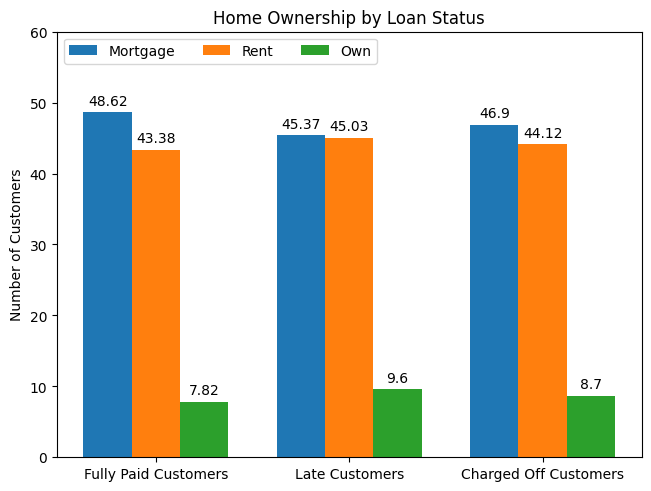

In [726]:
customers = ("Fully Paid Customers", "Late Customers", "Charged Off Customers")
home_ownership = {
    'Mortgage': ((round(13149/fully_paid_customers_df.shape[0] * 100, 2)), (round(397/late_customers_df.shape[0] * 100, 2)), (round(2566/charged_off_customers.shape[0] * 100, 2))),
    'Rent': ((round(11733/fully_paid_customers_df.shape[0] * 100, 2)), (round(394/late_customers_df.shape[0] * 100, 2)), (round(2414/charged_off_customers.shape[0] * 100, 2))),
    'Own': ((round(2115/fully_paid_customers_df.shape[0] * 100, 2)), (round(84/late_customers_df.shape[0] * 100, 2)), (round(476/charged_off_customers.shape[0] * 100, 2))),
}

x = np.arange(len(customers))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in home_ownership.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Number of Customers')
ax.set_title('Home Ownership by Loan Status')
ax.set_xticks(x + width, customers)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 60)

plt.show()

The grouped bar chart above visualises the percentages of home ownership of three different subsets of customers. I believe it shows that home ownership is not a clear indicator on whether a potential customer will be charged off or late on their loan repayments.